In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.results import get_results, get_experiment_details, average_scores_over_seeds
from dogo.plot_results import plot_experiment_metrics, plot_min_max_logvars, plot_grouped_evaluation_returns, plot_min_max_penalty

In [4]:
plt.rc('font', size=12)

In [5]:
######################
# Original Experiments
######################

# No REx
MP365 = get_results("MP365")
MP366 = get_results("MP366")
MP367 = get_results("MP367")

# REx - 10.0
MP374 = get_results("MP374")
MP375 = get_results("MP375")
MP376 = get_results("MP376")

#########################
# Additional Experiments
########################
# These were run to verify whether the success of REx and/or failure of no-REx was real or spurious
# No REx
MP729 = get_results("MP729")
MP730 = get_results("MP730")

# REx - 10.0
MP731 = get_results("MP731")
MP732 = get_results("MP732")

In [6]:
# No REx - MOPO Pen 1.0 - Rollout Length 5
MP704 = get_results("MP704")
MP692 = get_results("MP692")
MP712 = get_results("MP712")

# REx - MOPO Pen 1.0 - Rollout Length 5
MP708 = get_results("MP708")
MP696 = get_results("MP696")
MP716 = get_results("MP716")

# No REx - MOPO Pen 1.0 - Rollout Length 10
MP706 = get_results("MP706")
MP700 = get_results("MP700")
MP714 = get_results("MP714")

# REx - MOPO Pen 1.0 - Rollout Length 10
MP710 = get_results("MP710")
MP702 = get_results("MP702")
MP718 = get_results("MP718")

# No REx - MOPO Pen 0.0 - Rollout Length 5
MP705 = get_results("MP705")
MP693 = get_results("MP693")
MP713 = get_results("MP713")

# REx - MOPO Pen 0.0 - Rollout Length 5
MP709 = get_results("MP709")
MP697 = get_results("MP697")
MP717 = get_results("MP717")

# No REx - MOPO Pen 0.0 - Rollout Length 10
MP707 = get_results("MP707")
MP701 = get_results("MP701")
MP715 = get_results("MP715")

# REx - MOPO Pen 0.0 - Rollout Length 10
MP711 = get_results("MP711")
MP703 = get_results("MP703")
MP719 = get_results("MP719")

# No REx - MOPO Pen 1.0 - Rollout Length 5
MP886 = get_results("MP886")
MP887 = get_results("MP887")
MP888 = get_results("MP888")

# REx - MOPO Pen 1.0 - Rollout Length 5
MP889 = get_results("MP889")
MP890 = get_results("MP890")
MP891 = get_results("MP891")

# MP694 = get_results("MP694")
# MP695 = get_results("MP695")
# MP698 = get_results("MP698")
# MP699 = get_results("MP699")

## Sanity Check

Ensure that experiments which repeat earlier experiments having matching performance.

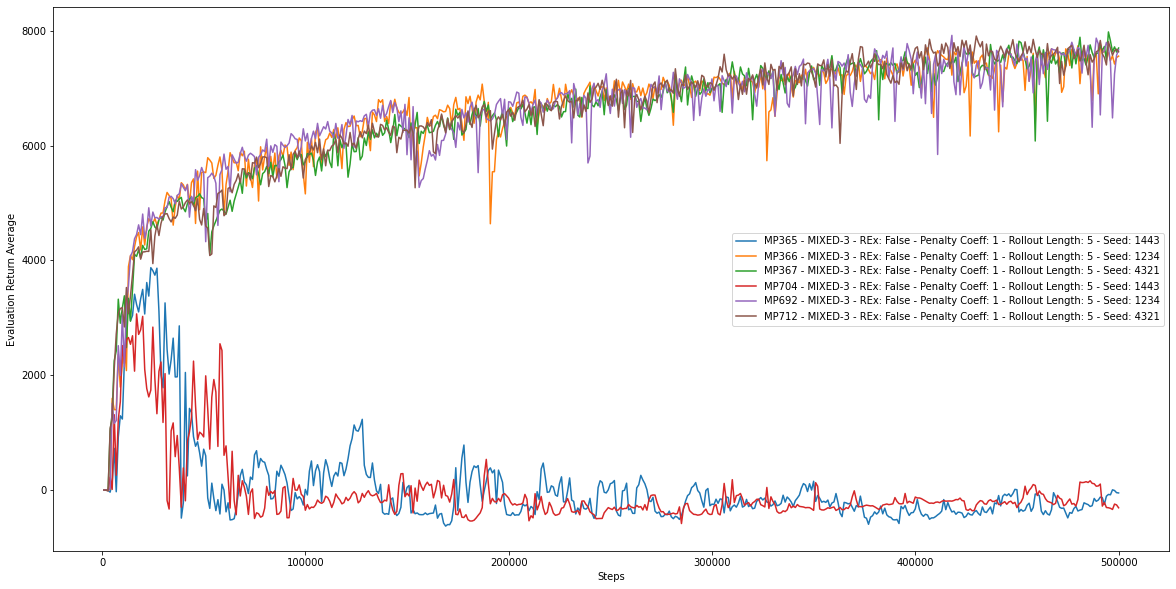

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for (exp, rex) in [
    (MP365, False),
    (MP366, False),
    (MP367, False),
    (MP704, False),
    (MP692, False),
    (MP712, False),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - REx: {rex} - Penalty Coeff: {exp.penalty_coeff} - Rollout Length: {exp.rollout_length} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel('Evaluation Return Average')
ax.legend()
pass

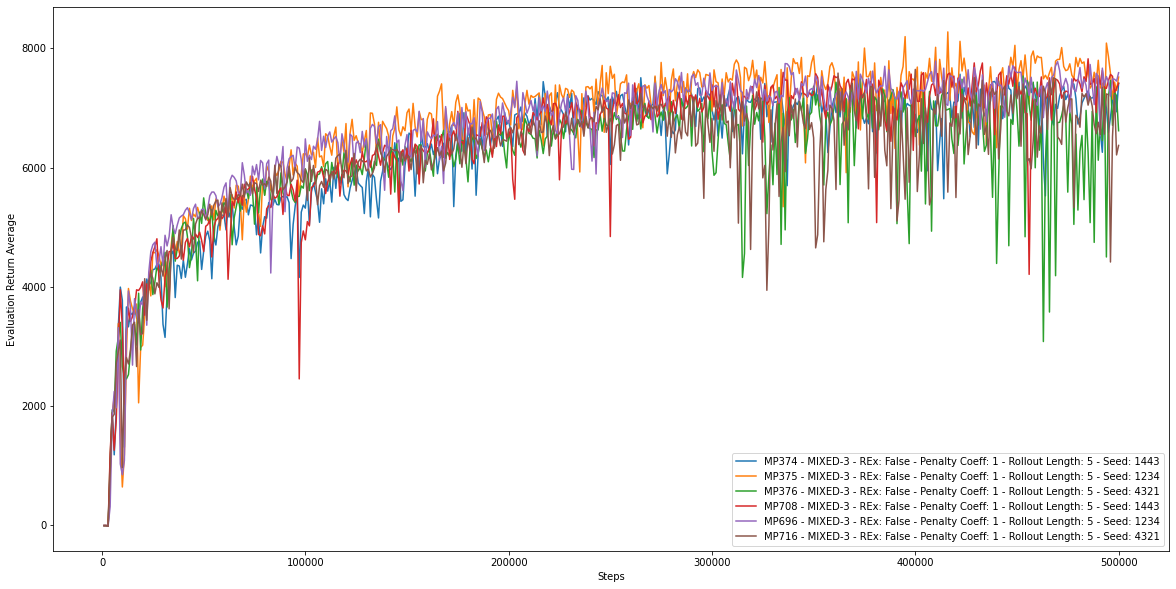

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for (exp, rex) in [
    (MP374, False),
    (MP375, False),
    (MP376, False),
    (MP708, False),
    (MP696, False),
    (MP716, False),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - REx: {rex} - Penalty Coeff: {exp.penalty_coeff} - Rollout Length: {exp.rollout_length} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel('Evaluation Return Average')
ax.legend()
pass

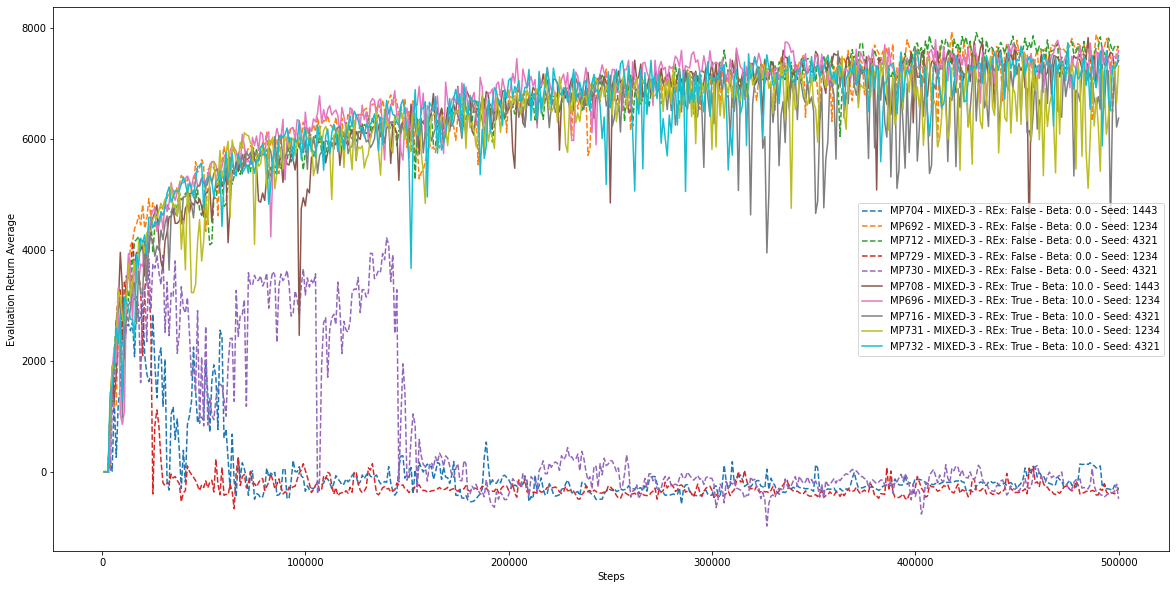

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp, rex, beta in [
    (MP704, False, 0.0),
    (MP692, False, 0.0),
    (MP712, False, 0.0),
    (MP729, False, 0.0),
    (MP730, False, 0.0),
    (MP708, True, 10.0),
    (MP696, True, 10.0),
    (MP716, True, 10.0),
    (MP731, True, 10.0),
    (MP732, True, 10.0),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], ls='--' if not rex else '-', label=f'{exp.name} - {exp.dataset} - REx: {rex} - Beta: {beta} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel('Evaluation Return Average')
ax.legend()
pass

{0.0: {'mean': 2839.0315673828127, 'std': 3934.203948318706},
 10.0: {'mean': 7235.98359375, 'std': 442.37529848078447}}

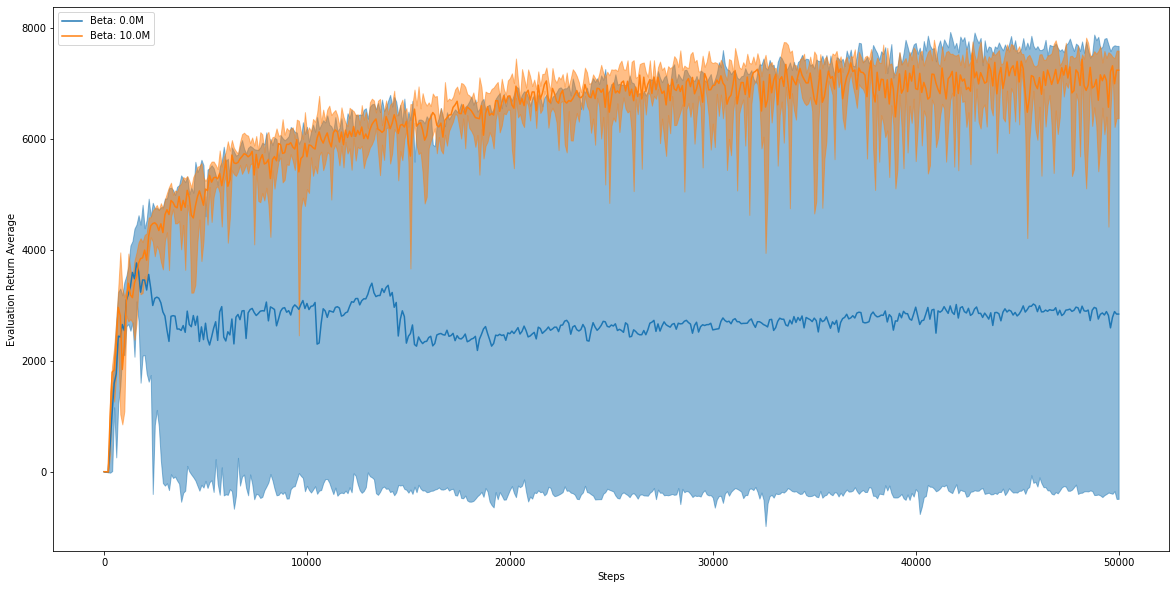

In [11]:
plot_grouped_evaluation_returns([
    ((MP704, MP692, MP712, MP729, MP730), 0.0),
    ((MP708, MP696, MP716, MP731, MP732), 10.0),
])

# MOPO: 0 - Rollout: 5

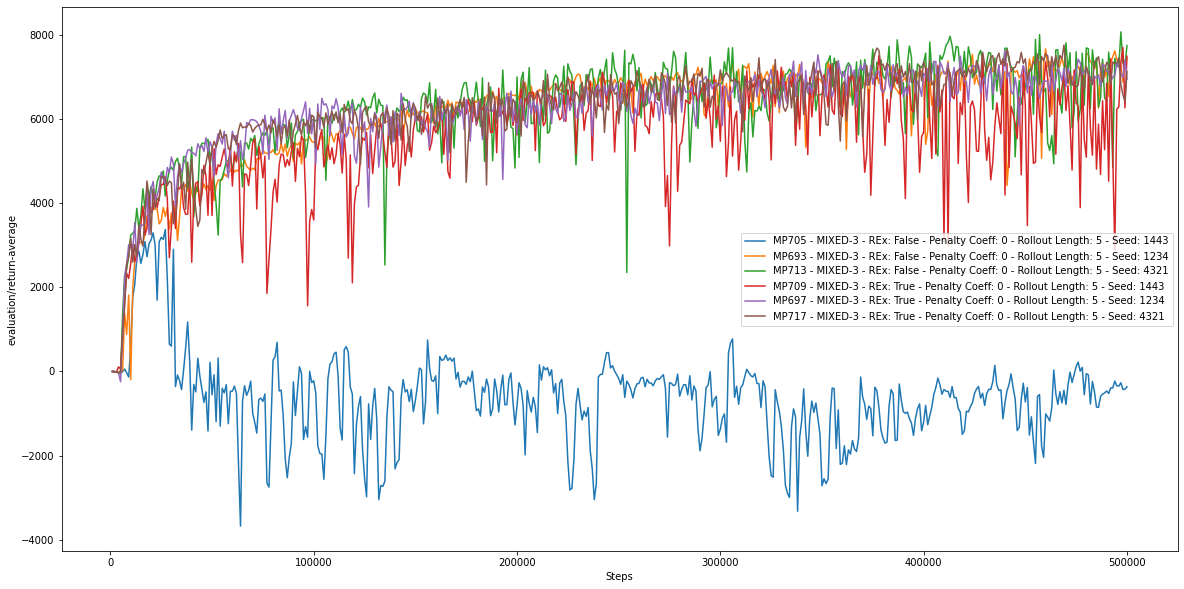

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for (exp, rex) in [
    (MP705, False),
    (MP693, False),
    (MP713, False),
    (MP709, True),
    (MP697, True),
    (MP717, True),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - REx: {rex} - Penalty Coeff: {exp.penalty_coeff} - Rollout Length: {exp.rollout_length} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

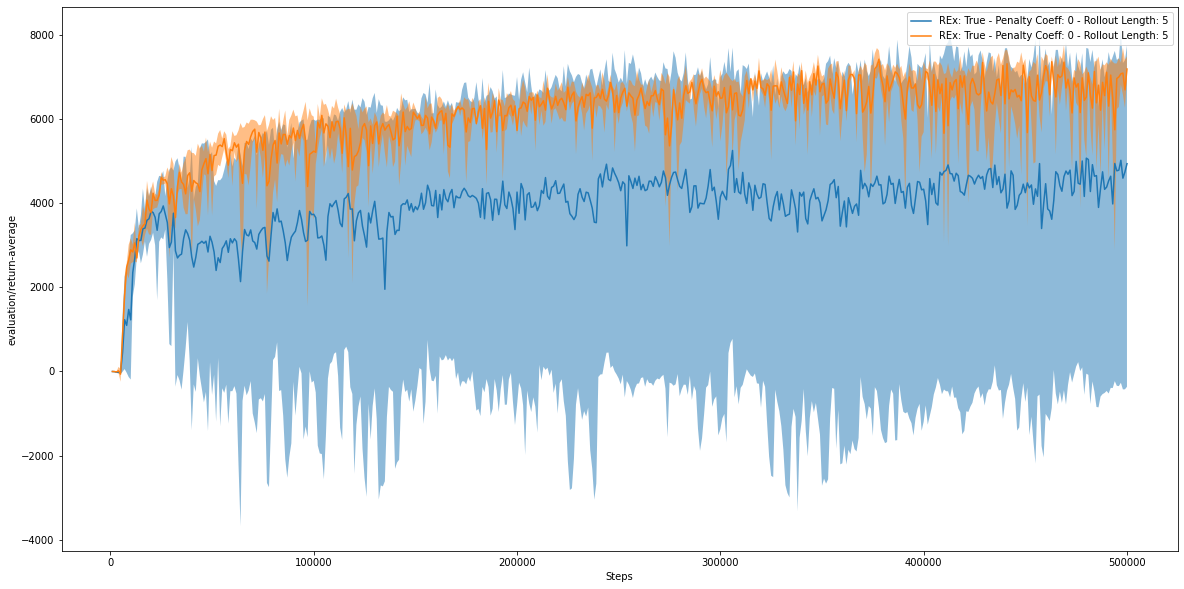

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp_set, rex in [
    ((MP705, MP693, MP713), True),
    ((MP709, MP697, MP717), True),
]:
    stacked_data = np.vstack([i.sac.result[feature] for i in exp_set])
    mean_vals = stacked_data.mean(axis=0)
    min_vals = stacked_data.min(axis=0)
    max_vals = stacked_data.max(axis=0)
    ax.plot(exp.sac.result['timesteps_total'], mean_vals, label=f'REx: {rex} - Penalty Coeff: {exp_set[0].penalty_coeff} - Rollout Length: {exp_set[0].rollout_length}')
    ax.fill_between(exp.sac.result['timesteps_total'], min_vals, max_vals, alpha=0.5)
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

# MOPO: 1 - Rollout: 5

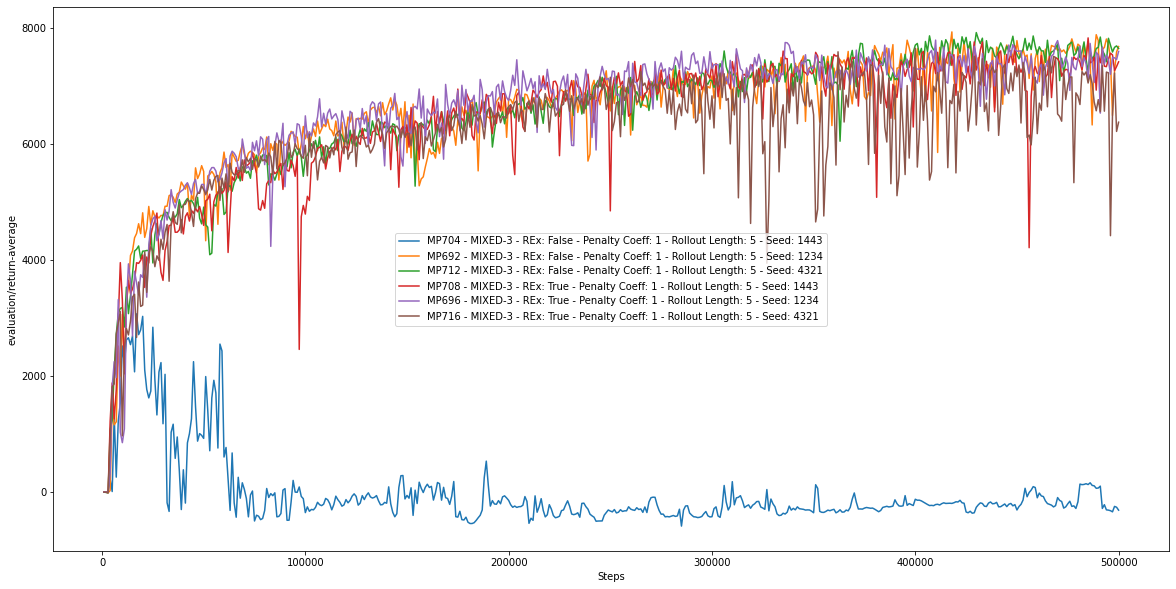

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for (exp, rex) in [
    (MP704, False),
    (MP692, False),
    (MP712, False),
    (MP708, True),
    (MP696, True),
    (MP716, True),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - REx: {rex} - Penalty Coeff: {exp.penalty_coeff} - Rollout Length: {exp.rollout_length} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

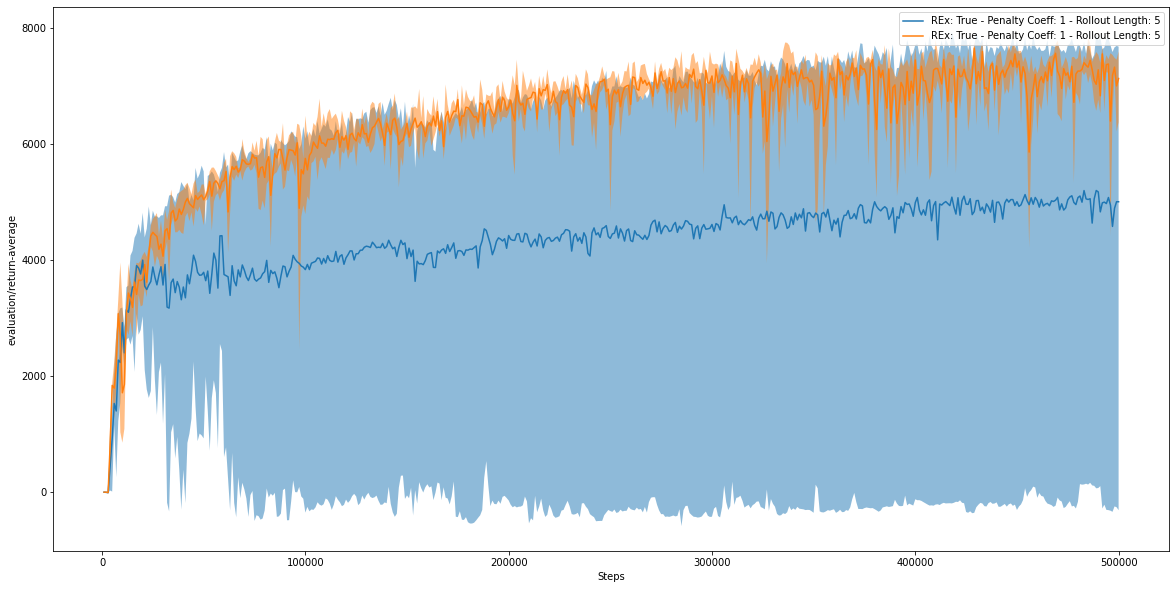

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp_set, rex in [
    ((MP704, MP692, MP712), True),
    ((MP708, MP696, MP716), True),
]:
    stacked_data = np.vstack([i.sac.result[feature] for i in exp_set])
    mean_vals = stacked_data.mean(axis=0)
    min_vals = stacked_data.min(axis=0)
    max_vals = stacked_data.max(axis=0)
    ax.plot(exp.sac.result['timesteps_total'], mean_vals, label=f'REx: {rex} - Penalty Coeff: {exp_set[0].penalty_coeff} - Rollout Length: {exp_set[0].rollout_length}')
    ax.fill_between(exp.sac.result['timesteps_total'], min_vals, max_vals, alpha=0.5)
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

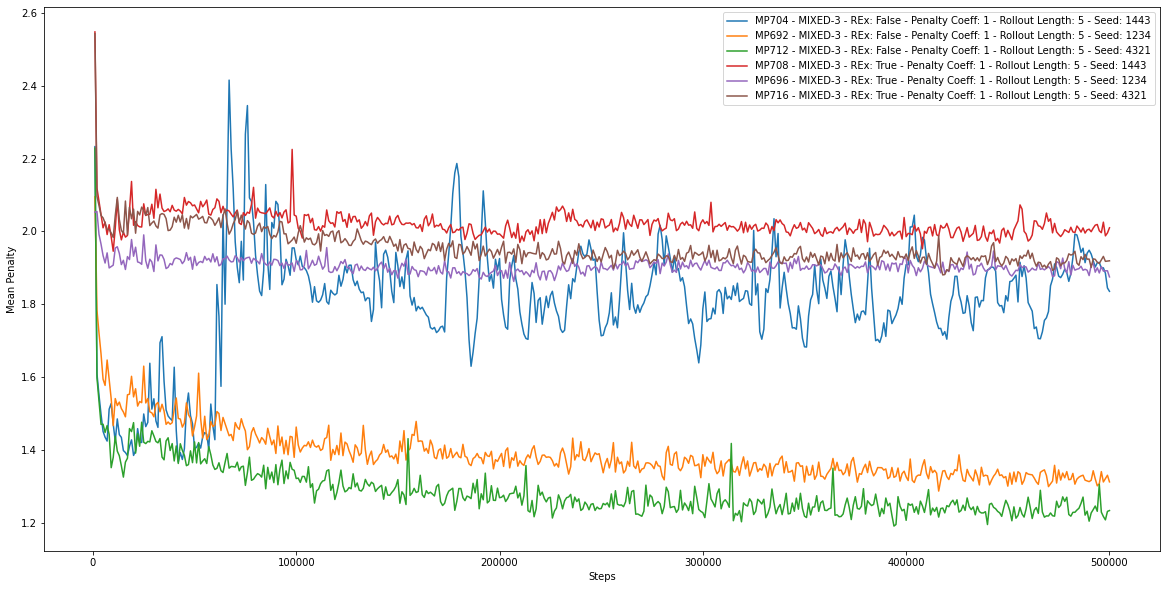

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'model/mean_penalty'
for (exp, rex) in [
    (MP704, False),
    (MP692, False),
    (MP712, False),
    (MP708, True),
    (MP696, True),
    (MP716, True),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - REx: {rex} - Penalty Coeff: {exp.penalty_coeff} - Rollout Length: {exp.rollout_length} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel('Mean Penalty')
ax.legend()
pass

# MOPO: 5 - Rollout: 5

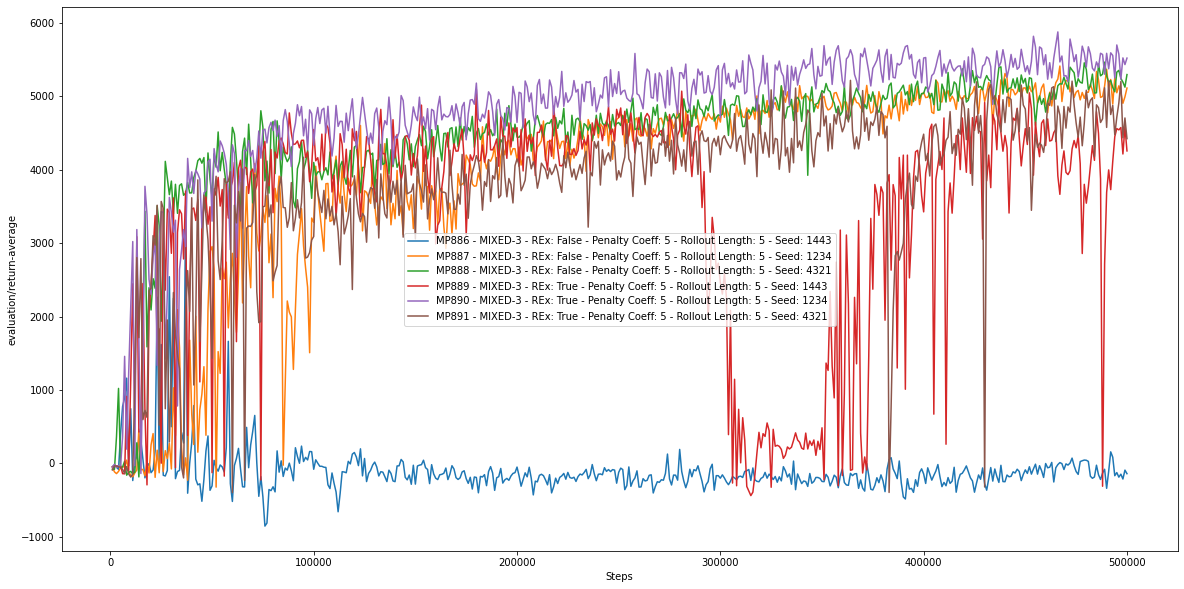

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for (exp, rex) in [
    (MP886, False),
    (MP887, False),
    (MP888, False),
    (MP889, True),
    (MP890, True),
    (MP891, True),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - REx: {rex} - Penalty Coeff: {exp.penalty_coeff} - Rollout Length: {exp.rollout_length} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

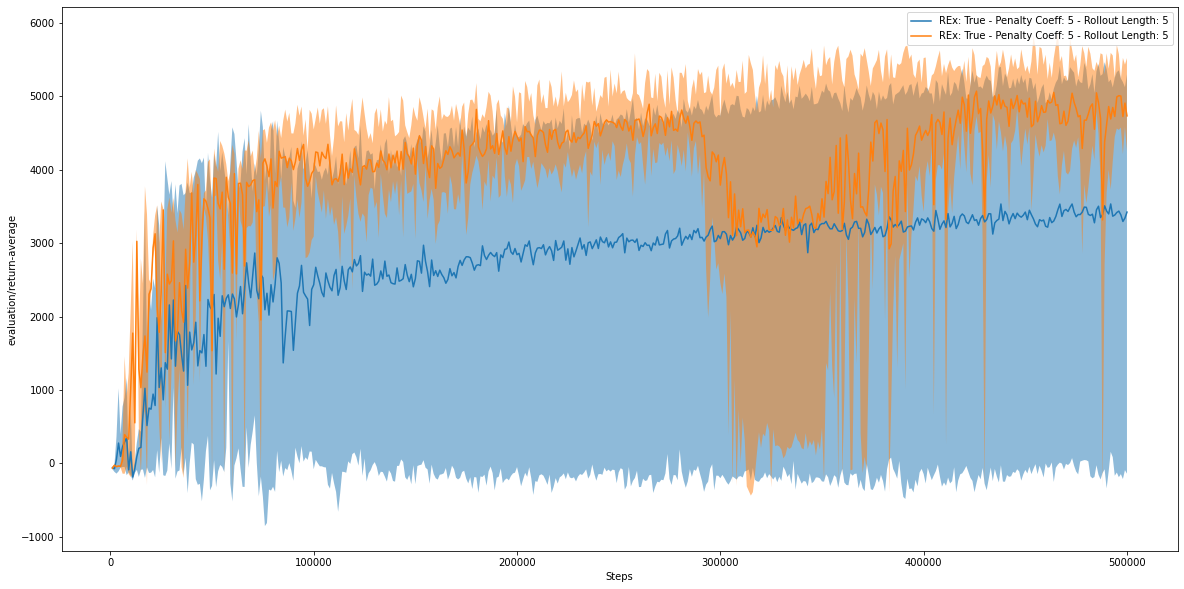

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp_set, rex in [
    ((MP886, MP887, MP888), True),
    ((MP889, MP890, MP891), True),
]:
    stacked_data = np.vstack([i.sac.result[feature] for i in exp_set])
    mean_vals = stacked_data.mean(axis=0)
    min_vals = stacked_data.min(axis=0)
    max_vals = stacked_data.max(axis=0)
    ax.plot(exp.sac.result['timesteps_total'], mean_vals, label=f'REx: {rex} - Penalty Coeff: {exp_set[0].penalty_coeff} - Rollout Length: {exp_set[0].rollout_length}')
    ax.fill_between(exp.sac.result['timesteps_total'], min_vals, max_vals, alpha=0.5)
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

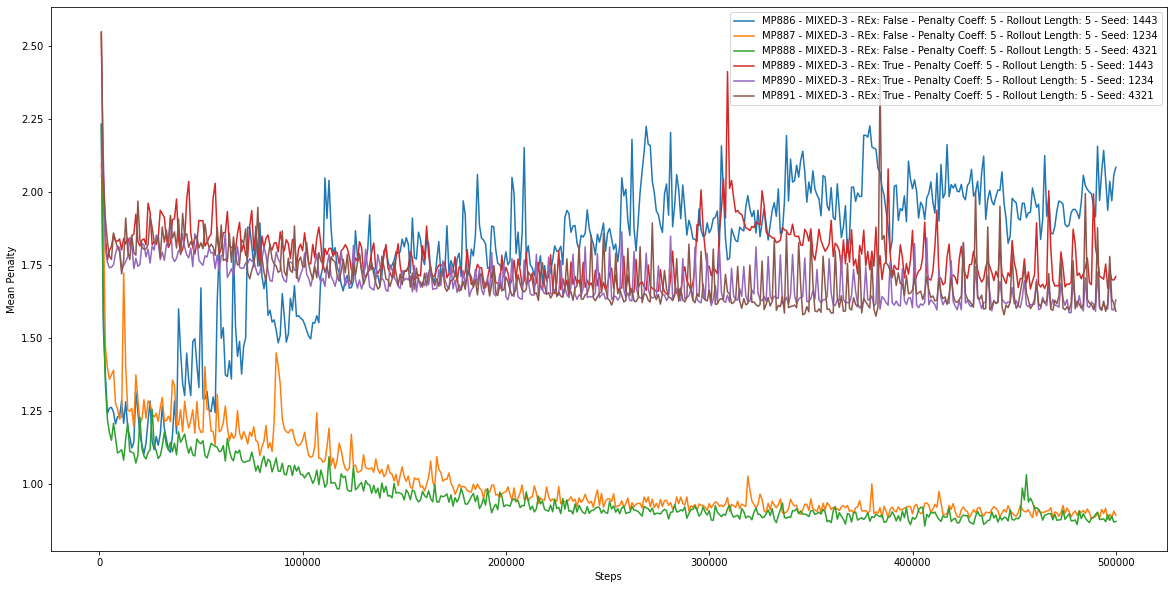

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'model/mean_penalty'
for (exp, rex) in [
    (MP886, False),
    (MP887, False),
    (MP888, False),
    (MP889, True),
    (MP890, True),
    (MP891, True),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - REx: {rex} - Penalty Coeff: {exp.penalty_coeff} - Rollout Length: {exp.rollout_length} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel('Mean Penalty')
ax.legend()
pass

# MOPO: 0 - Rollout: 10

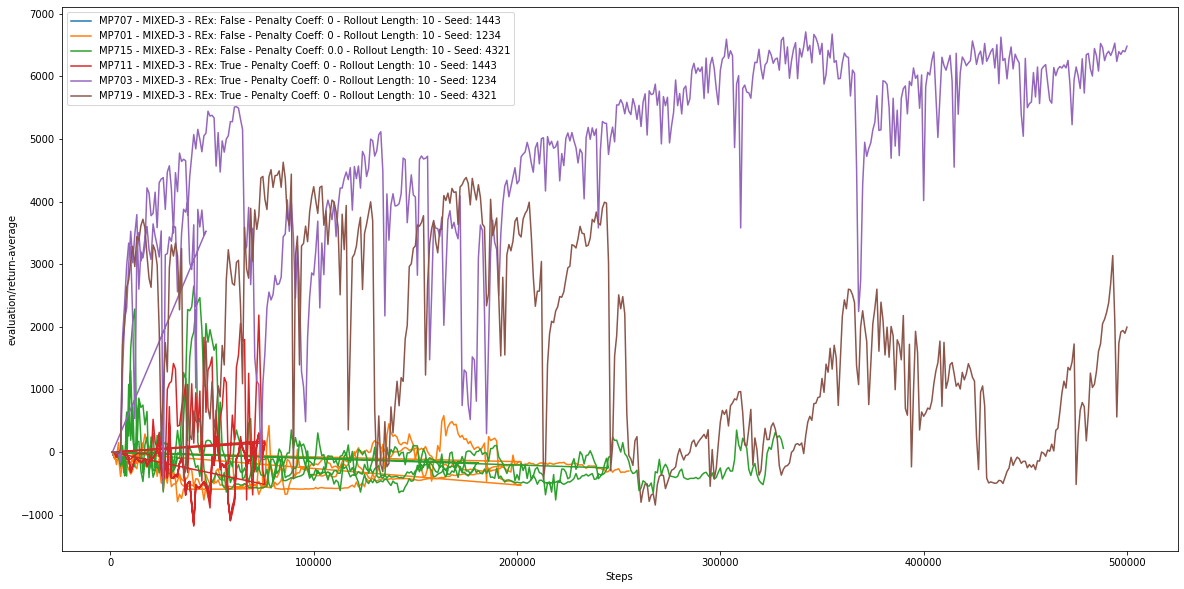

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for (exp, rex) in [
    (MP707, False),
    (MP701, False),
    (MP715, False),
    (MP711, True),
    (MP703, True),
    (MP719, True),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - REx: {rex} - Penalty Coeff: {exp.penalty_coeff} - Rollout Length: {exp.rollout_length} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

# MOPO: 1 - Rollout: 10

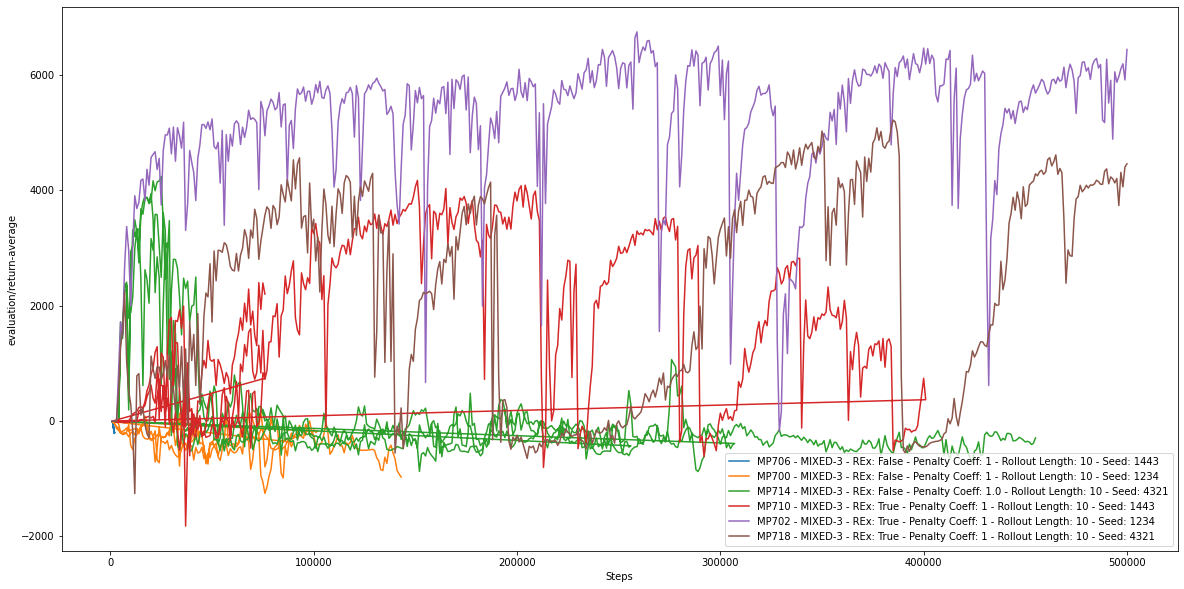

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for (exp, rex) in [
    (MP706, False),
    (MP700, False),
    (MP714, False),
    (MP710, True),
    (MP702, True),
    (MP718, True),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - REx: {rex} - Penalty Coeff: {exp.penalty_coeff} - Rollout Length: {exp.rollout_length} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

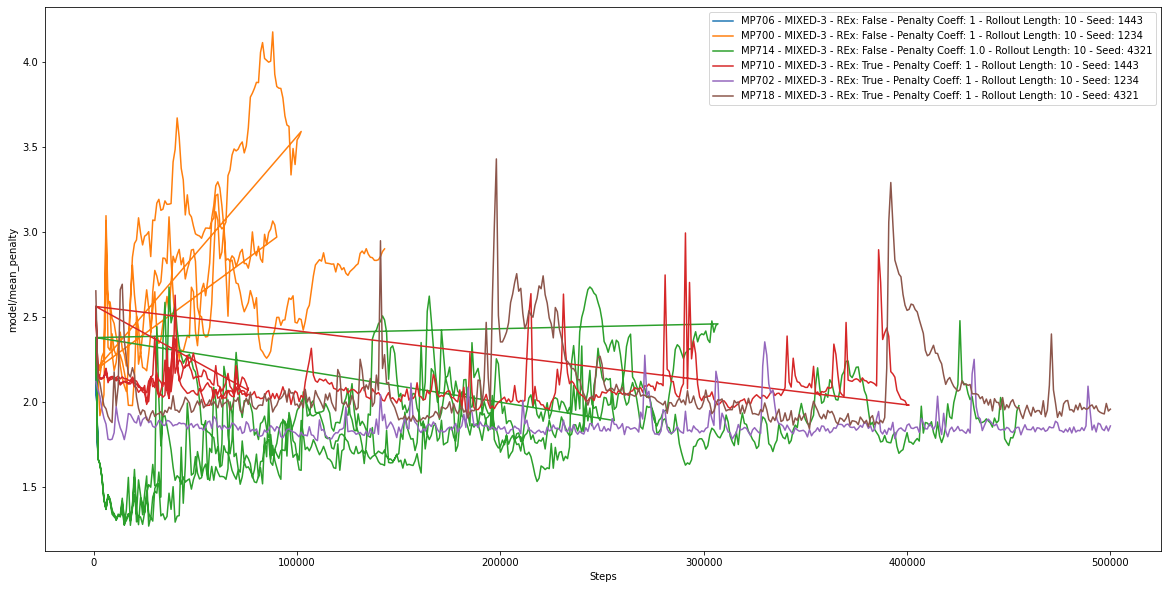

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'model/mean_penalty'
for (exp, rex) in [
    (MP706, False),
    (MP700, False),
    (MP714, False),
    (MP710, True),
    (MP702, True),
    (MP718, True),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - REx: {rex} - Penalty Coeff: {exp.penalty_coeff} - Rollout Length: {exp.rollout_length} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass